In [ ]:
pip install numpy pandas scikit-learn pyswarm


  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=4cb5008a95a4dcdf2cbc4fb9642371824195a8cef165762fa23aac6844edab2a
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from pyswarm import pso

# Load the dataset
data = pd.read_csv("data.csv")

# Separate features and target
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Define the objective function
def objective_function(features, X, y):
    X_subset = X.iloc[:, features.astype(bool)]
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return -accuracy_score(y_test, y_pred)  # Negative accuracy since pso minimizes

# Define bounds for the features
lb = np.zeros(X.shape[1])
ub = np.ones(X.shape[1])

# Define PSO function
def pso_feature_selection(X, y):
    initial_guess = np.ones(X.shape[1])
    features_selected, _ = pso(objective_function, lb, ub, args=(X, y), swarmsize=10, maxiter=10, debug=True, phip=0.5, phig=0.5, omega=0.5, minstep=1e-8, minfunc=1e-8)
    return features_selected.astype(bool)

# Perform feature selection using PSO
selected_features = pso_feature_selection(X, y)

# Get the selected features
selected_indices = np.where(selected_features)[0]
selected_column_names = X.columns[selected_indices]

print("Selected Features:")
print(selected_column_names)


No constraints given.
Best after iteration 1: [0.74399615 0.51388054 0.3419337  0.04092516 0.0076874  0.83669337
 0.99803009 0.60930026 0.80526186 0.49019513 0.99148042 0.19039415
 0.11216375 0.68913694 0.44272469 0.74360507 0.20844944 0.77944249
 0.90095998 0.51871262 0.91459809 0.46496725 0.75644427 0.452907
 0.62571907 0.99179335 0.65527566 0.37018273 0.0022969  0.52000248
 0.93633762] -0.9649122807017544
Best after iteration 2: [0.74399615 0.51388054 0.3419337  0.04092516 0.0076874  0.83669337
 0.99803009 0.60930026 0.80526186 0.49019513 0.99148042 0.19039415
 0.11216375 0.68913694 0.44272469 0.74360507 0.20844944 0.77944249
 0.90095998 0.51871262 0.91459809 0.46496725 0.75644427 0.452907
 0.62571907 0.99179335 0.65527566 0.37018273 0.0022969  0.52000248
 0.93633762] -0.9649122807017544
Best after iteration 3: [0.74399615 0.51388054 0.3419337  0.04092516 0.0076874  0.83669337
 0.99803009 0.60930026 0.80526186 0.49019513 0.99148042 0.19039415
 0.11216375 0.68913694 0.44272469 0.7436

No constraints given.
Best after iteration 1: [0.29290522 0.97071573 0.22160561 0.71171879 0.39488673 0.57891124
 0.5464852  0.64509205 0.63158721 0.72522085 0.02266565 0.54218292
 0.39133242 0.11550026 0.91012731 0.60691861 0.09956028 0.65801539
 0.17311328 0.99576438 0.53791921 0.55193116 0.55166628 0.01671883
 0.0866244  0.87163567 0.90844775 0.46189105 0.60842531 0.73977979
 0.12109792] -0.9649122807017544
Best after iteration 2: [0.29290522 0.97071573 0.22160561 0.71171879 0.39488673 0.57891124
 0.5464852  0.64509205 0.63158721 0.72522085 0.02266565 0.54218292
 0.39133242 0.11550026 0.91012731 0.60691861 0.09956028 0.65801539
 0.17311328 0.99576438 0.53791921 0.55193116 0.55166628 0.01671883
 0.0866244  0.87163567 0.90844775 0.46189105 0.60842531 0.73977979
 0.12109792] -0.9649122807017544
Best after iteration 3: [0.29290522 0.97071573 0.22160561 0.71171879 0.39488673 0.57891124
 0.5464852  0.64509205 0.63158721 0.72522085 0.02266565 0.54218292
 0.39133242 0.11550026 0.91012731 0.

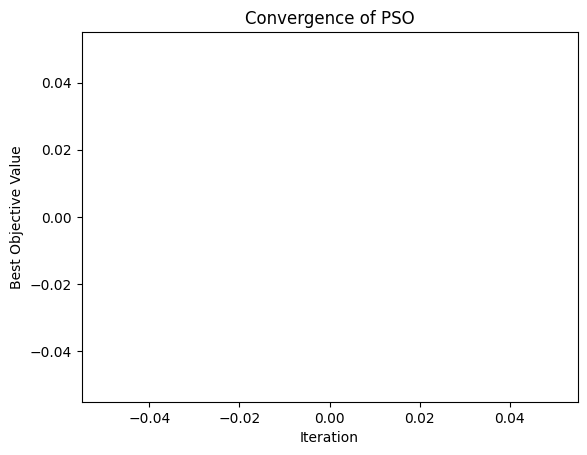

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from pyswarm import pso
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("data.csv")

# Separate features and target
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Define the objective function
def objective_function(features, X, y):
    X_subset = X.iloc[:, features.astype(bool)]
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return -accuracy_score(y_test, y_pred)  # Negative accuracy since pso minimizes

# Define bounds for the features
lb = np.zeros(X.shape[1])
ub = np.ones(X.shape[1])

# Define PSO function
def pso_feature_selection(X, y):
    global plot_data
    plot_data = []
    def callback(xk, _):
        best_value = objective_function(xk, X, y)
        plot_data.append(best_value)
        print(f"Iteration: {len(plot_data)}, Best Value: {best_value}")

    initial_guess = np.ones(X.shape[1])
    features_selected, _ = pso(objective_function, lb, ub, args=(X, y), swarmsize=10, maxiter=10, debug=True, phip=0.5, phig=0.5, omega=0.5, minstep=1e-8, minfunc=1e-8)
    return features_selected.astype(bool)

# Perform feature selection using PSO
selected_features = pso_feature_selection(X, y)

# Get the selected features
selected_indices = np.where(selected_features)[0]
selected_column_names = X.columns[selected_indices]

print("Selected Features:")
print(selected_column_names)

# Plot convergence curve
plt.plot(plot_data)
plt.title('Convergence of PSO')
plt.xlabel('Iteration')
plt.ylabel('Best Objective Value')
plt.show()


No constraints given.
New best for swarm at iteration 1: [0.63164249 0.32122358 0.10962814 0.82377884 1.         0.48129409
 0.25938637 0.03295031 0.26904634 0.         0.         1.
 0.         0.08222177 0.69827325 0.53396214 0.54945244 0.92933824
 0.         0.69737522 0.         0.44642913 0.20504572 1.
 0.3723053  1.         1.         0.15416882 0.         0.86038526
 0.04547962] -0.9736842105263158
Best after iteration 1: [0.63164249 0.32122358 0.10962814 0.82377884 1.         0.48129409
 0.25938637 0.03295031 0.26904634 0.         0.         1.
 0.         0.08222177 0.69827325 0.53396214 0.54945244 0.92933824
 0.         0.69737522 0.         0.44642913 0.20504572 1.
 0.3723053  1.         1.         0.15416882 0.         0.86038526
 0.04547962] -0.9736842105263158
Best after iteration 2: [0.63164249 0.32122358 0.10962814 0.82377884 1.         0.48129409
 0.25938637 0.03295031 0.26904634 0.         0.         1.
 0.         0.08222177 0.69827325 0.53396214 0.54945244 0.9293382

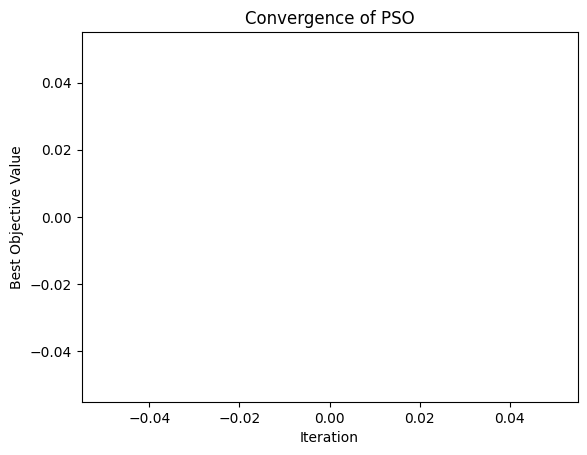

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from pyswarm import pso
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("data.csv")

# Separate features and target
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Define the objective function
def objective_function(features, X, y):
    X_subset = X.iloc[:, features.astype(bool)]
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return -accuracy_score(y_test, y_pred)  # Negative accuracy since pso minimizes

# Define bounds for the features
lb = np.zeros(X.shape[1])
ub = np.ones(X.shape[1])

# Define PSO function
def pso_feature_selection(X, y):
    global plot_data
    plot_data = []
    def callback(xk, _):
        best_value = objective_function(xk, X, y)
        plot_data.append(best_value)
        print(f"Iteration: {len(plot_data)}, Best Value: {best_value}")

    initial_guess = np.ones(X.shape[1])
    features_selected, _ = pso(objective_function, lb, ub, args=(X, y), swarmsize=10, maxiter=100, debug=True, phip=0.5, phig=0.5, omega=0.5, minstep=1e-8, minfunc=1e-8)
    return features_selected.astype(bool)

# Perform feature selection using PSO
selected_features = pso_feature_selection(X, y)

# Get the selected features
selected_indices = np.where(selected_features)[0]
selected_column_names = X.columns[selected_indices]

print("Selected Features:")
print(selected_column_names)

# Plot convergence curve
plt.plot(plot_data)
plt.title('Convergence of PSO')
plt.xlabel('Iteration')
plt.ylabel('Best Objective Value')
plt.show()


No constraints given.
New best for swarm at iteration 1: [0.64738046 0.33202778 1.         0.35387852 0.71173303 0.92746122
 0.44105181 0.81982912 0.17958423 0.06567361 0.66723236 0.26401237
 0.47664018 0.48432244 0.42949768 0.99254423 0.37325426 0.31619747
 0.03450134 0.83390904 0.6563747  0.89691264 0.45337149 0.95393956
 0.48393568 0.40697334 0.62509398 0.         0.         0.12083074
 0.        ] -0.9736842105263158
Best after iteration 1: [0.64738046 0.33202778 1.         0.35387852 0.71173303 0.92746122
 0.44105181 0.81982912 0.17958423 0.06567361 0.66723236 0.26401237
 0.47664018 0.48432244 0.42949768 0.99254423 0.37325426 0.31619747
 0.03450134 0.83390904 0.6563747  0.89691264 0.45337149 0.95393956
 0.48393568 0.40697334 0.62509398 0.         0.         0.12083074
 0.        ] -0.9736842105263158
Best after iteration 2: [0.64738046 0.33202778 1.         0.35387852 0.71173303 0.92746122
 0.44105181 0.81982912 0.17958423 0.06567361 0.66723236 0.26401237
 0.47664018 0.48432244 0.

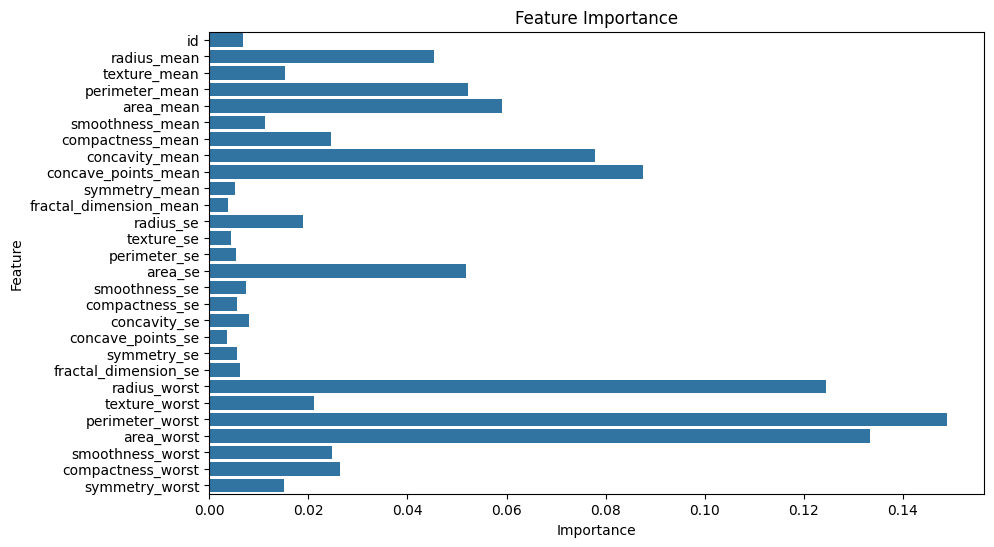

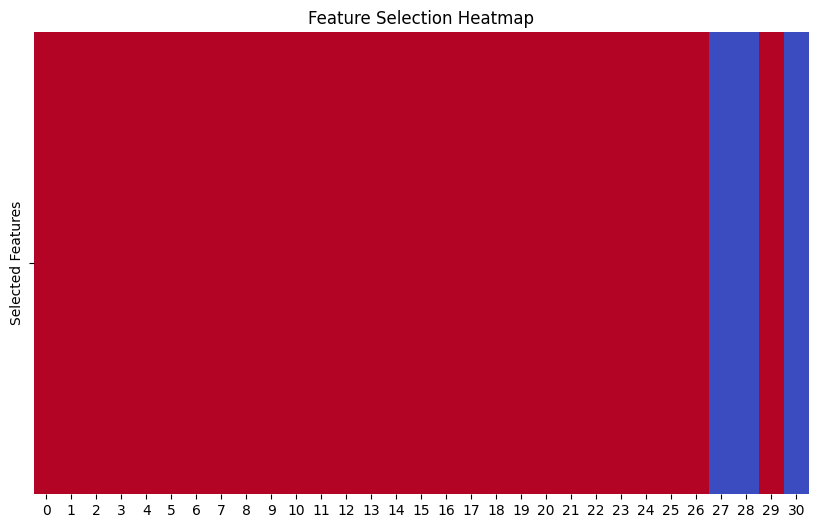

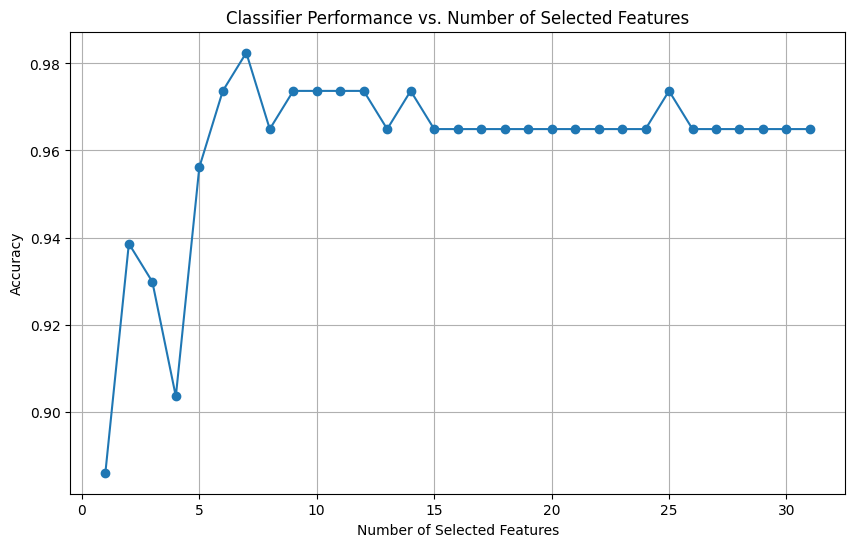

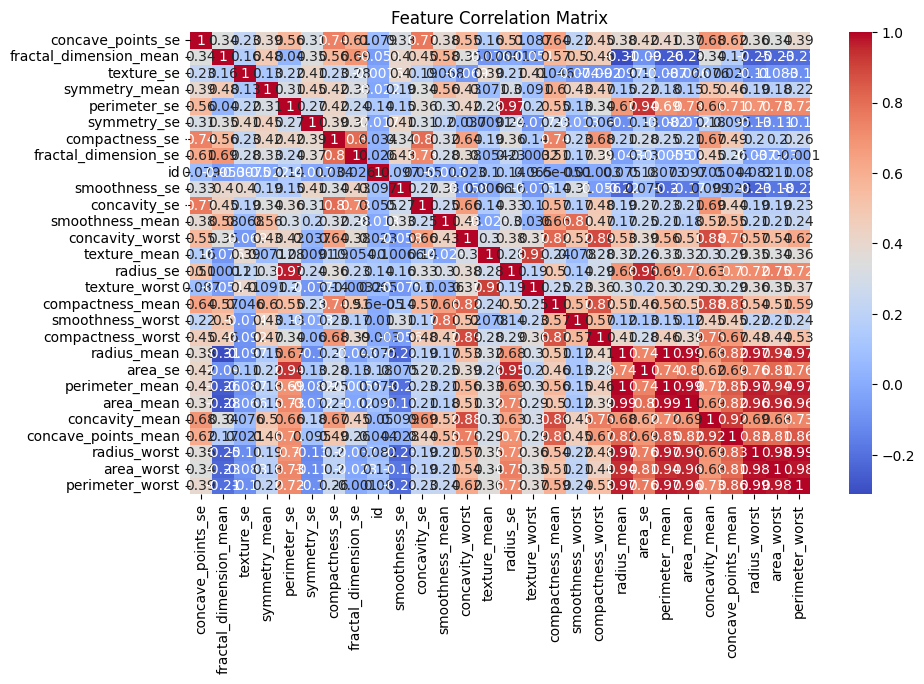

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from pyswarm import pso
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("data.csv")

# Separate features and target
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Define the objective function
def objective_function(features, X, y):
    X_subset = X.iloc[:, features.astype(bool)]
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_subset, y, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train_sub, y_train_sub)
    y_pred_sub = clf.predict(X_test_sub)
    return -accuracy_score(y_test_sub, y_pred_sub)  # Negative accuracy since pso minimizes

# Define bounds for the features
lb = np.zeros(X.shape[1])
ub = np.ones(X.shape[1])

# Define PSO function
def pso_feature_selection(X, y):
    initial_guess = np.ones(X.shape[1])
    features_selected, _ = pso(objective_function, lb, ub, args=(X, y), swarmsize=10, maxiter=10, debug=True, phip=0.5, phig=0.5, omega=0.5, minstep=1e-8, minfunc=1e-8)
    return features_selected.astype(bool)

# Perform feature selection using PSO
selected_features = pso_feature_selection(X, y)

# Get the selected features
selected_indices = np.where(selected_features)[0]
selected_column_names = X.columns[selected_indices]

print("Selected Features:")
print(selected_column_names)

# Visualizations

# 2. Feature Importance Plot
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X.iloc[:, selected_indices], y)
feature_importance = clf.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=X.columns[selected_indices])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# 3. Feature Selection Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(selected_features.reshape(1, -1), cmap='coolwarm', cbar=False, yticklabels=['Selected Features'])
plt.title('Feature Selection Heatmap')
plt.show()

# 4. Classifier Performance Plot
performance = []
num_features = []
for i in range(1, X.shape[1] + 1):
    selected_indices = np.argsort(feature_importance)[-i:]
    X_subset = X.iloc[:, selected_indices]
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_subset, y, test_size=0.2, random_state=42)
    clf.fit(X_train_sub, y_train_sub)
    y_pred_sub = clf.predict(X_test_sub)
    accuracy = accuracy_score(y_test_sub, y_pred_sub)
    performance.append(accuracy)
    num_features.append(i)

plt.figure(figsize=(10, 6))
plt.plot(num_features, performance, marker='o')
plt.title('Classifier Performance vs. Number of Selected Features')
plt.xlabel('Number of Selected Features')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# 5. Feature Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(X.iloc[:, selected_indices].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()
